AGC を切ったスマホの指向性調査


In [1]:
import sys

sys.path.append("../")

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
from positioning.readwav import readwav
from positioning.get_spectrum_amplitude import get_tukey_spectrum_amplitude
from positioning.sound_db import TukeyDB
from positioning import tools

In [3]:
# sns.set_style("whitegrid")
plt.style.use(["science", "notebook"])

In [4]:
angles = np.arange(-90, 100, 10)

In [5]:
signals = [readwav(f"../data/phone-angle-agc-off/angle{a}.wav")[:, 1] for a in angles]

In [6]:
len(signals[0])

1564800

In [7]:
spectrum = []
amplitude = []
for s in signals:
    spec = []
    ampli = []
    for i in range(10):
        sp, amp = get_tukey_spectrum_amplitude(
            s[i * 96000 : (i + 2) * 96000],
            first_freq=15000,
            last_freq=22000,
            ampli_band="all",
        )
        spec.append(sp)
        ampli.append(amp)
    spectrum.append(spec)
    amplitude.append(ampli)

In [8]:
df_amplitude = pd.DataFrame()
for i, a in enumerate(angles):
    df_tmp = pd.DataFrame({"amplitude": amplitude[i], "angle": a})
    df_amplitude = pd.concat([df_amplitude, df_tmp])
df_amplitude.reset_index(inplace=True, drop=True)

In [9]:
df_amplitude

,amplitude,angle
0,0.797939,-90
1,0.802646,-90
2,0.803523,-90
3,0.786129,-90
4,0.788723,-90
...,...,...
185,0.646197,90
186,0.635923,90
187,0.639747,90
188,0.638194,90


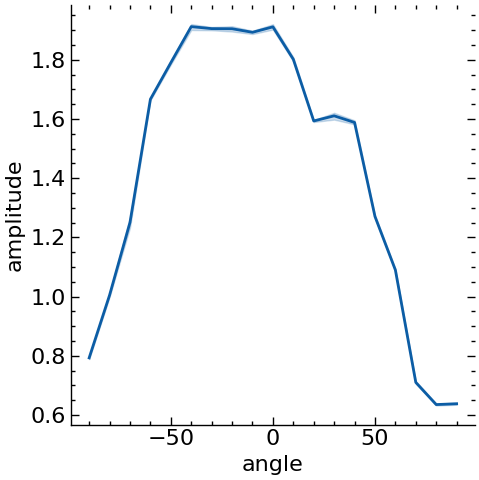

In [10]:
sns.relplot(data=df_amplitude, x="angle", y="amplitude", kind="line")

角度正：時計回りに回転


In [11]:
df_amplitude["nomalized_amplitude"] = (
    df_amplitude["amplitude"] / df_amplitude["amplitude"].max()
)

Text(9.444444444444445, 0.5, 'Amplitude')

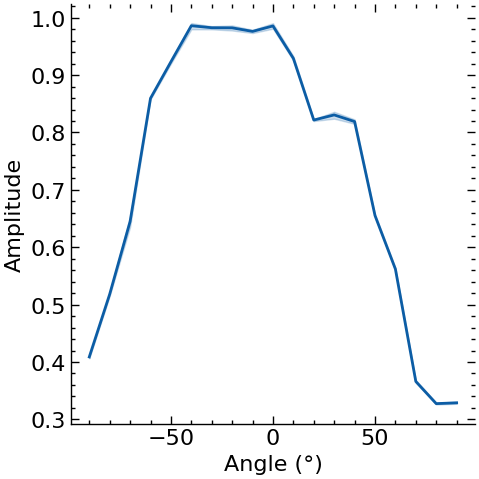

In [12]:
sns.relplot(data=df_amplitude, x="angle", y="nomalized_amplitude", kind="line")
plt.xlabel("Angle (°)")
plt.ylabel("Amplitude")